# TPC-C MySQL 17.5 - Application Metrics

* data is generated and loaded into databases in a distributed filesystem
* experiments do not use preloaded data

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from bexhoma import collectors

%matplotlib inline

# Collect Results

In [2]:
path = r"C:\data\benchmarks"
#path = r"/home/perdelt/benchmarks"


In [3]:
codes = [
    "1757496209"
]

codes

['1757496209']

In [4]:
collect = collectors.benchbase(path, codes)

# Get all Metrics Metadata

In [5]:
code = codes[0]
evaluate = collect.get_evaluator(code)
collect.df_metrics = collect.get_metrics(evaluate)

collect.df_metrics

,title,active,type,metric
total_cpu_memory,Memory Usage [MiB],True,cluster,gauge
total_cpu_memory_cached,Memory Usage Cached [MiB],True,cluster,gauge
total_cpu_util,CPU Utilization,True,cluster,gauge
total_cpu_throttled,CPU Throttle,True,cluster,gauge
total_cpu_throttled_s,CPU Throttled Time [s],True,cluster,counter
total_cpu_util_others,CPU Utilization Others,False,cluster,gauge
total_cpu_util_s,CPU Utilization Time [s],True,cluster,counter
total_cpu_util_user_s,CPU User Time [s],True,cluster,counter
total_cpu_util_sys_s,CPU System Time [s],True,cluster,counter
total_cpu_util_others_s,CPU Utilization Time Others [s],False,cluster,counter


# Get Values Aggregated per SUT and per Experiment

In [6]:
df_performance = collect.get_monitoring_all(type="stream")
df_performance.T

,0,1
client,1,2
Memory Usage [MiB],6395.93,6845.26
Memory Usage Cached [MiB],11232.61,14630.25
CPU Utilization,7.42,9.54
CPU Throttle,0.0,0.0
CPU Throttled Time [s],0.0,0.0
CPU Utilization Time [s],2832.33,3015.87
CPU User Time [s],1930.53,2051.38
CPU System Time [s],901.8,964.49
Network Rx Total [MiB],4378.91,3096.74


# Barplot of All Metrics for a Single Experiment

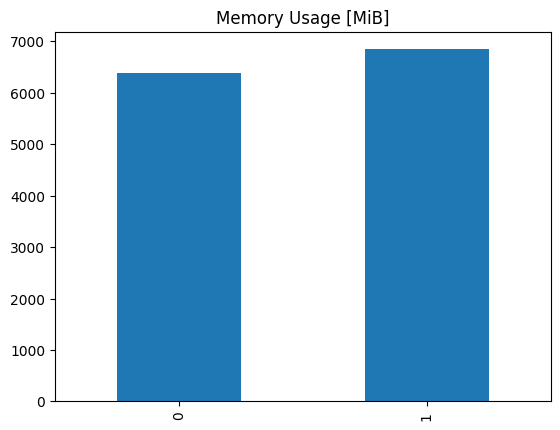

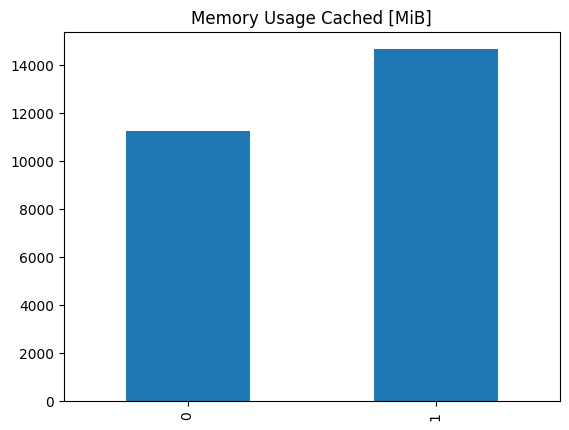

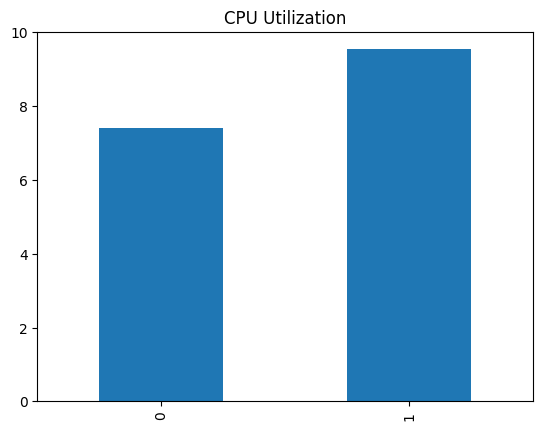

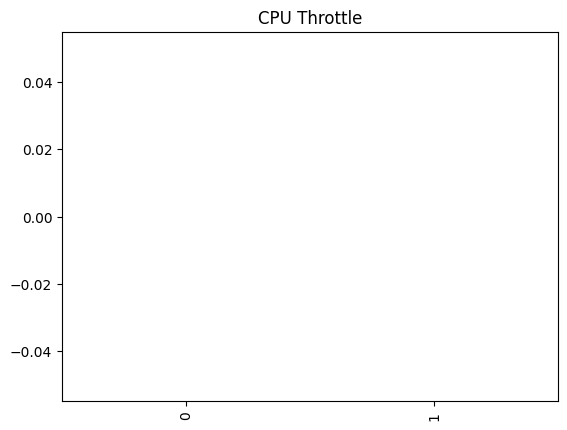

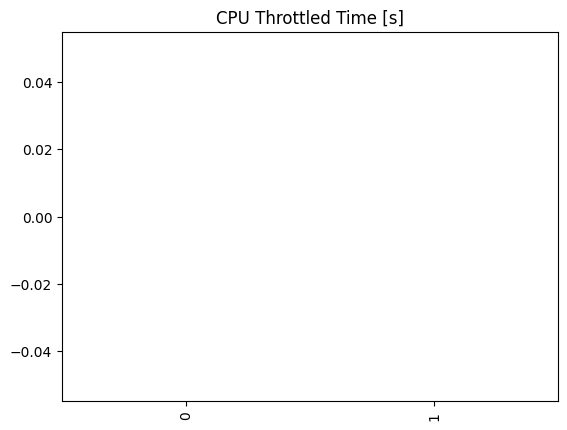

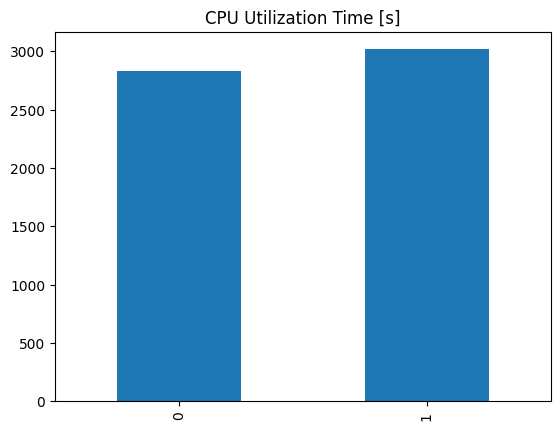

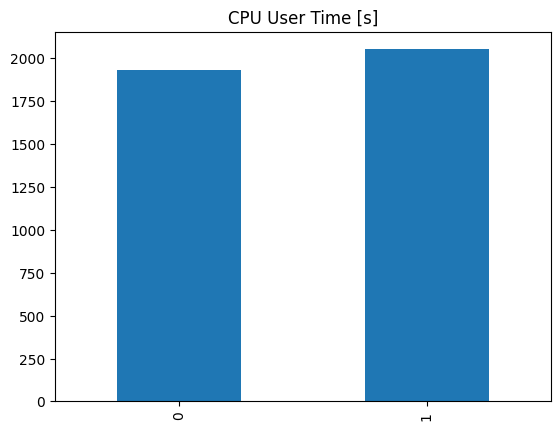

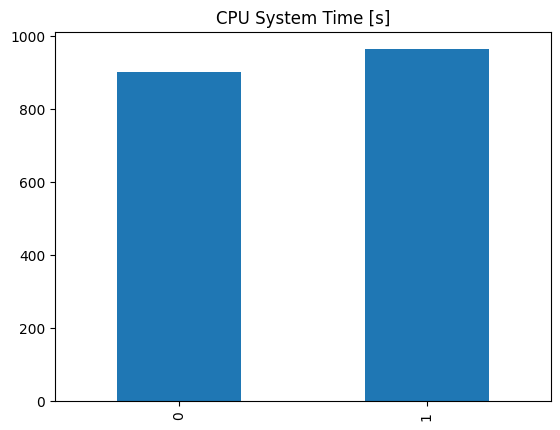

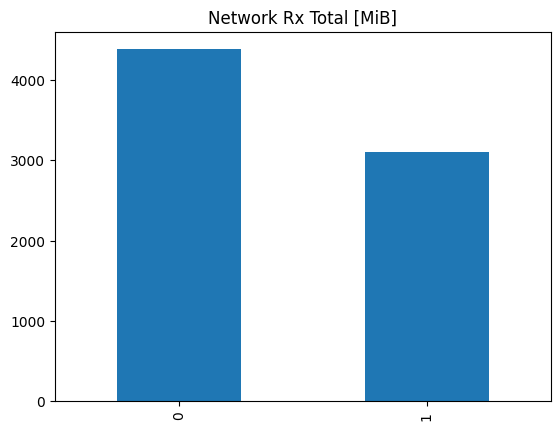

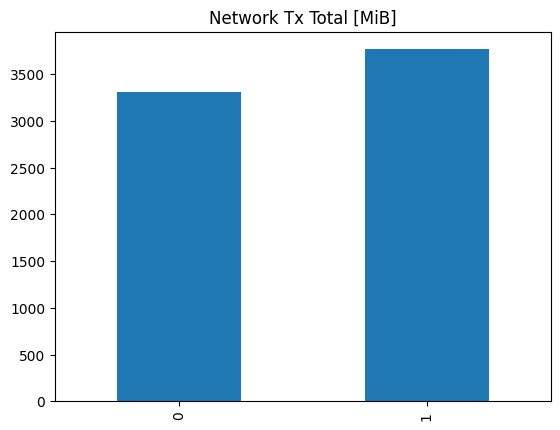

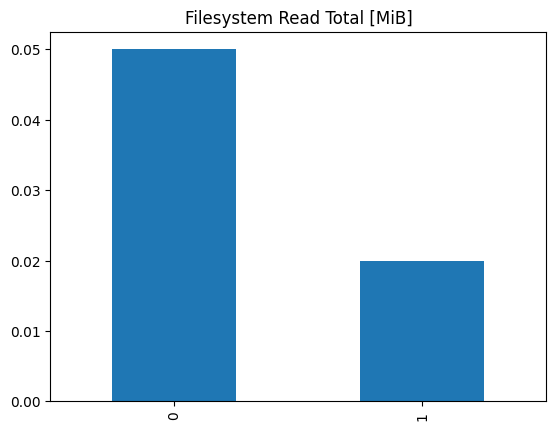

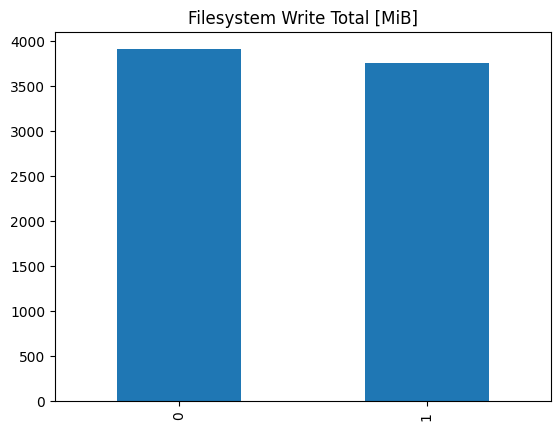

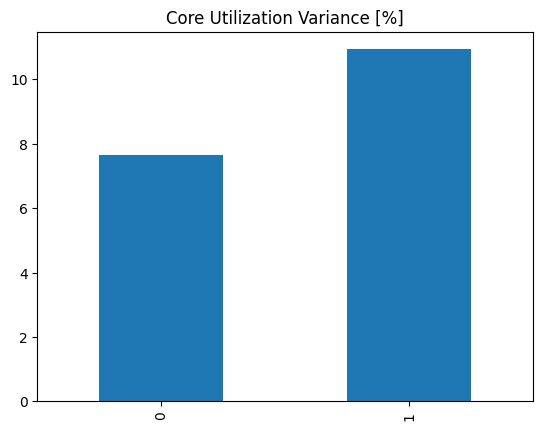

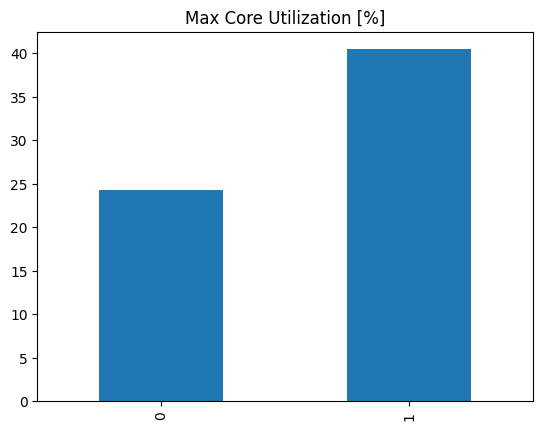

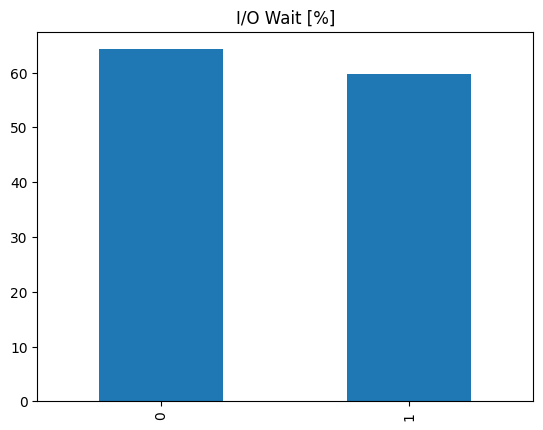

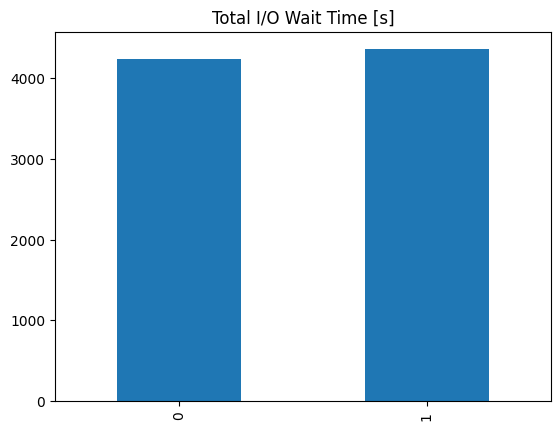

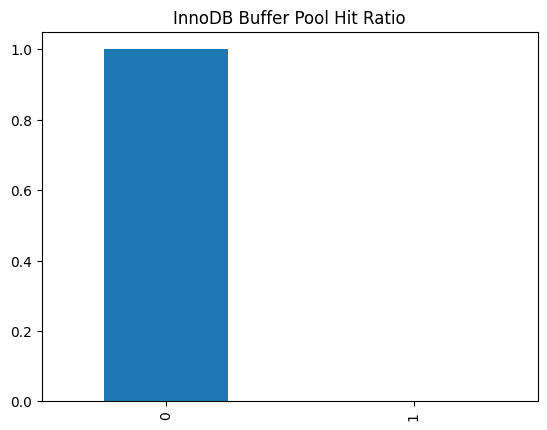

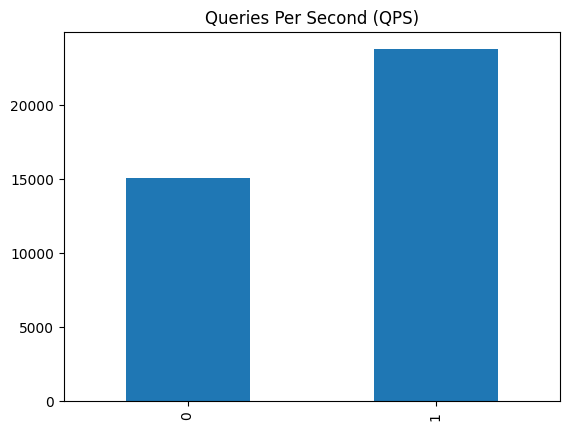

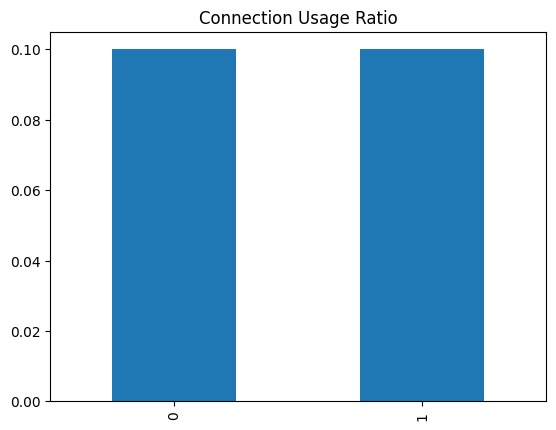

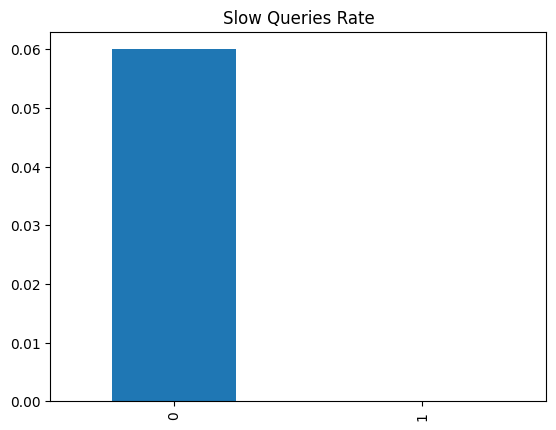

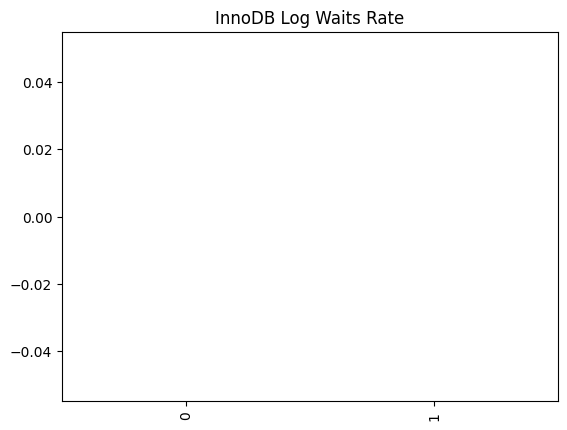

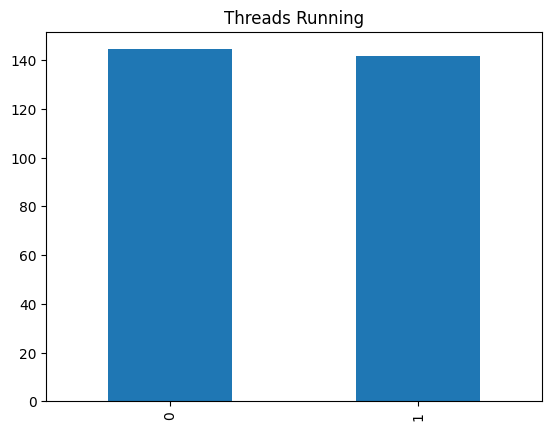

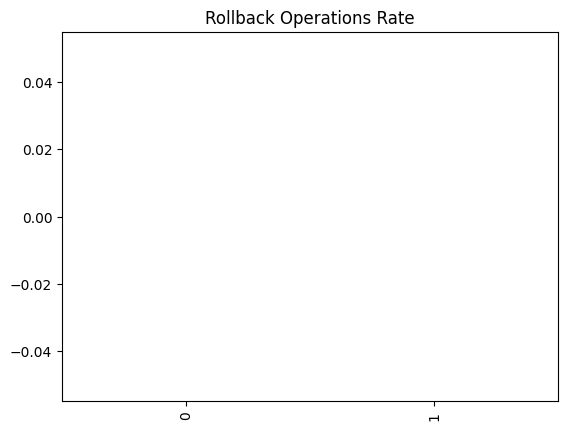

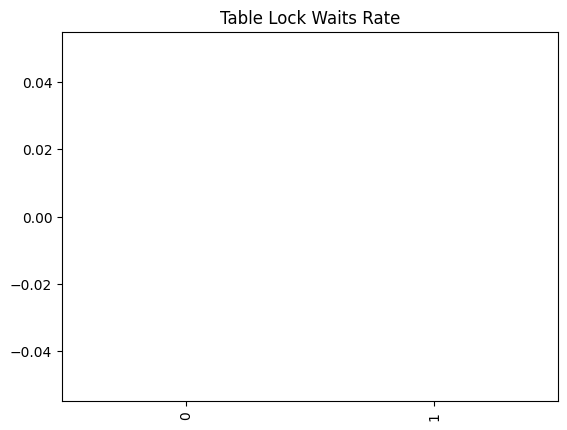

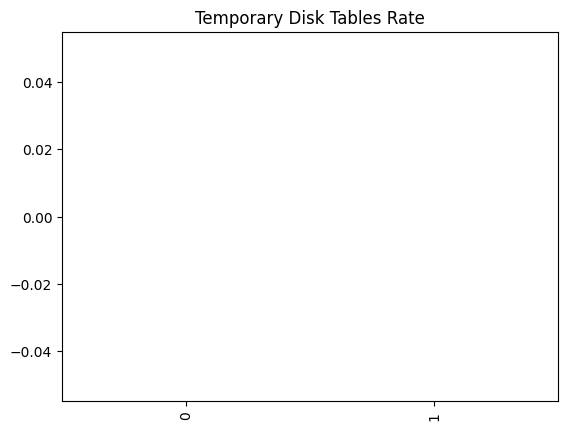

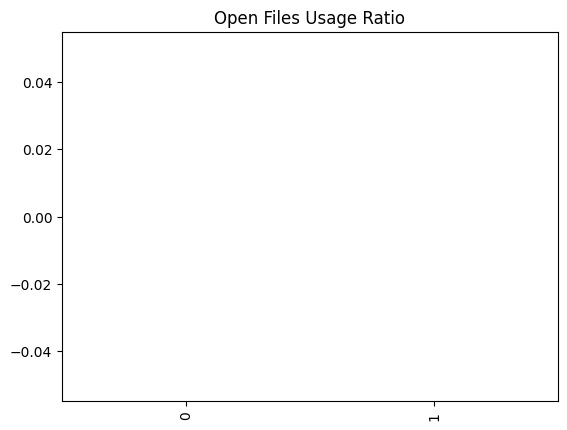

In [7]:
results = []
code = codes[0]
for idx, row in collect.df_metrics.iterrows():
    if row["active"] == False:
        continue
    #print(idx, row["title"])
    metric_name = idx
    method = 'diff' if row["metric"] == 'counter' else 'mean'
    col_name = row["title"]
    #df_monitoring = collect.get_monitoring_single(code, metric=metric_name)
    #print(df_monitoring)
    #plot_boxplots(df_monitoring, y=metric_name, title=col_name)
    ax = df_performance[col_name].plot.bar()
    ax.set_title(col_name)
    plt.show()
    #plot_boxplots(df_performance_first, y='value', title=collect.df_metrics.loc[metric]['title'])

# Boxplot of All Metrics for a Single Experiment

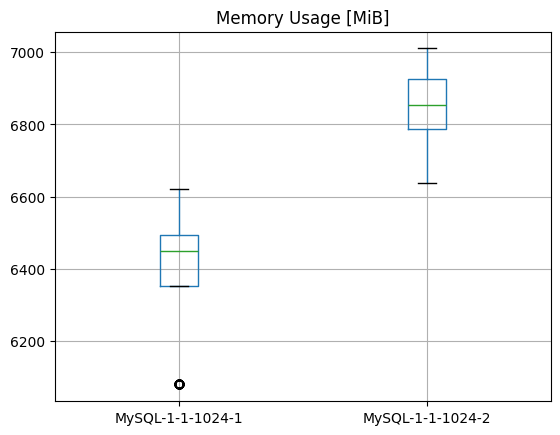

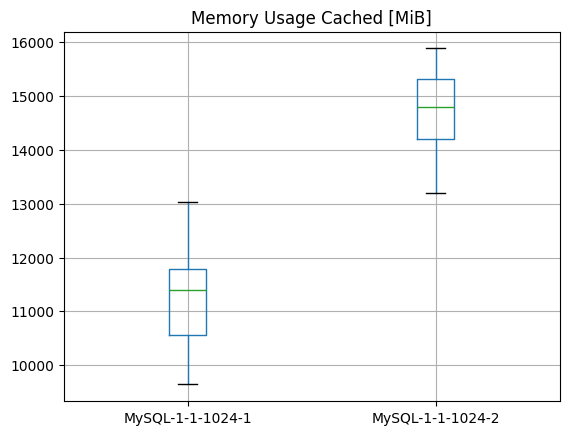

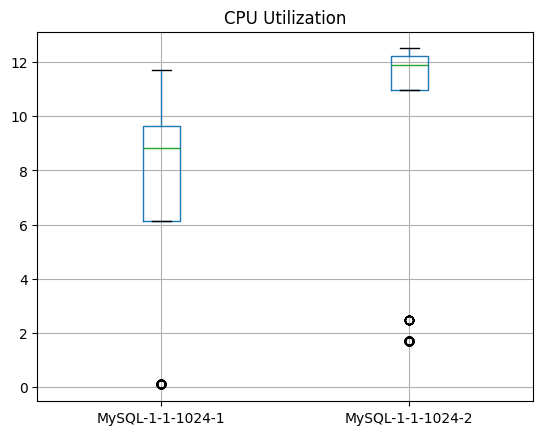

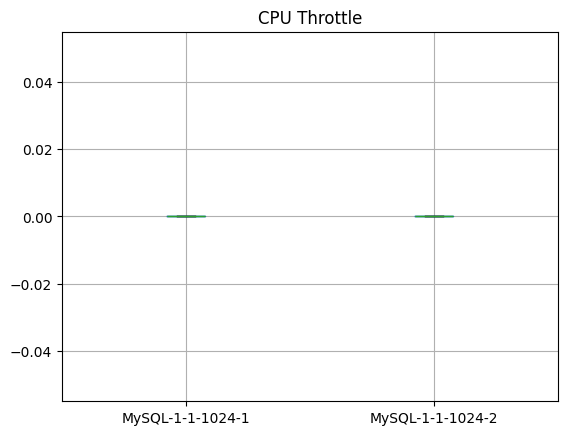

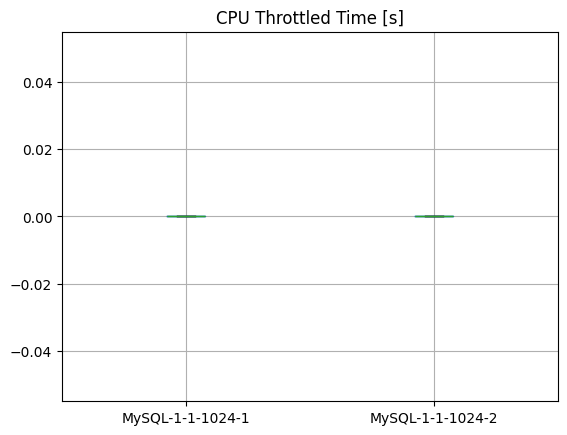

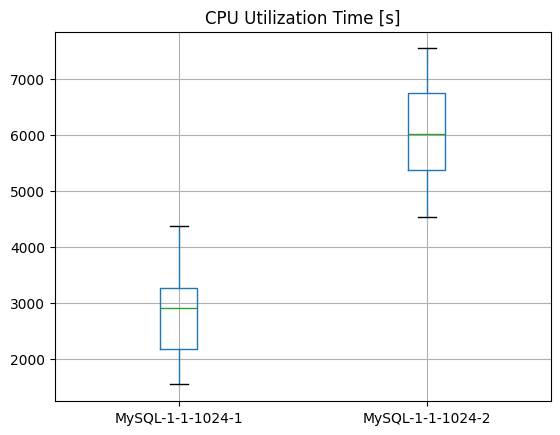

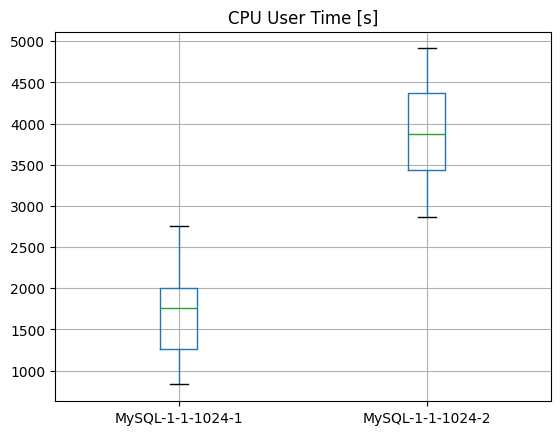

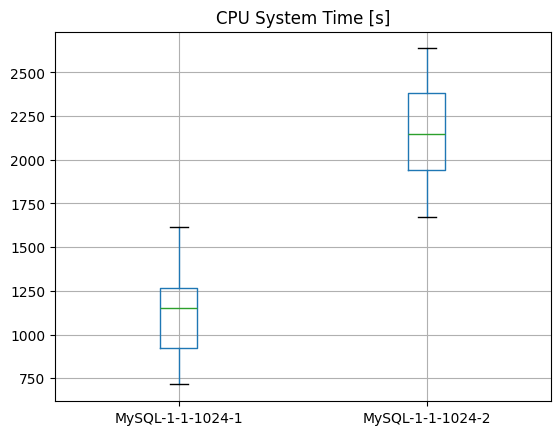

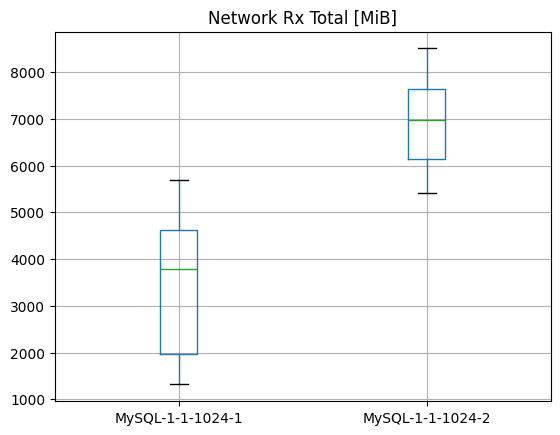

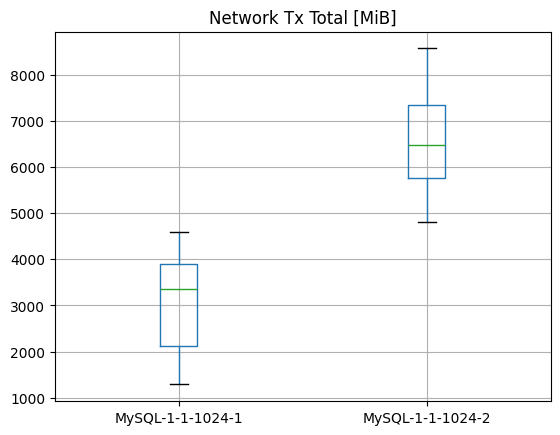

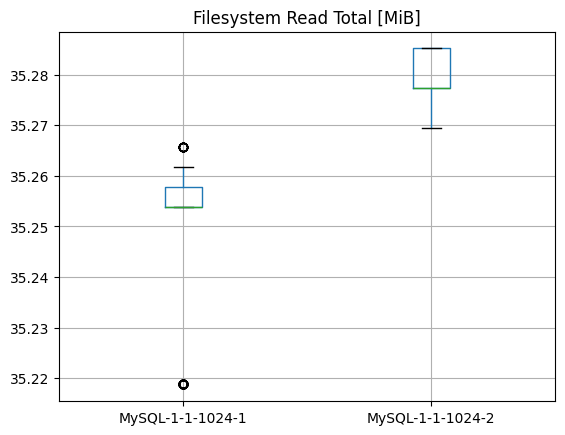

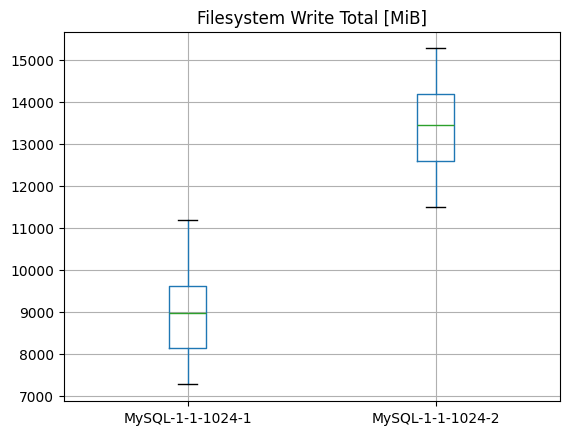

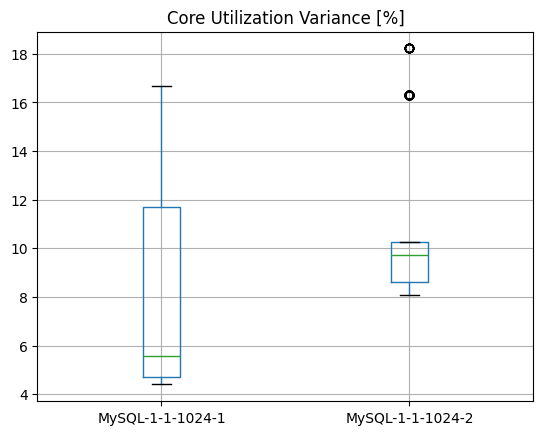

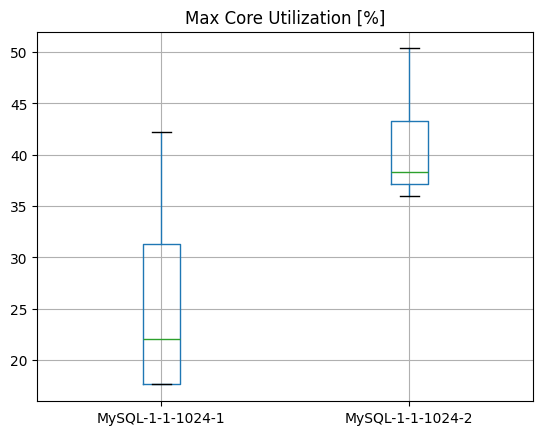

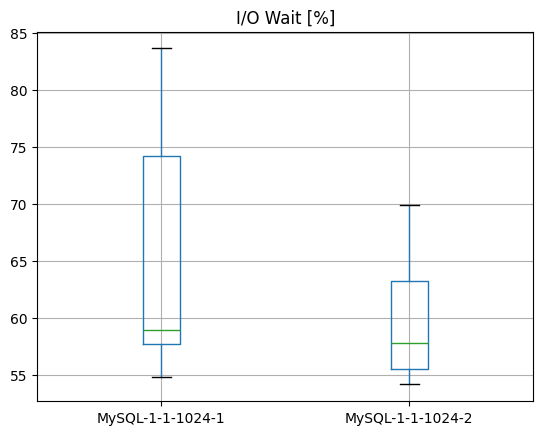

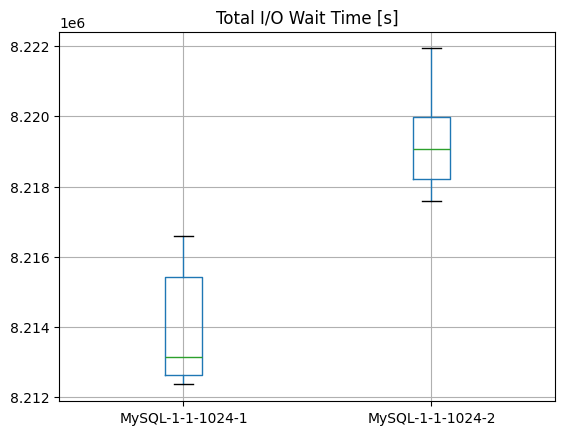

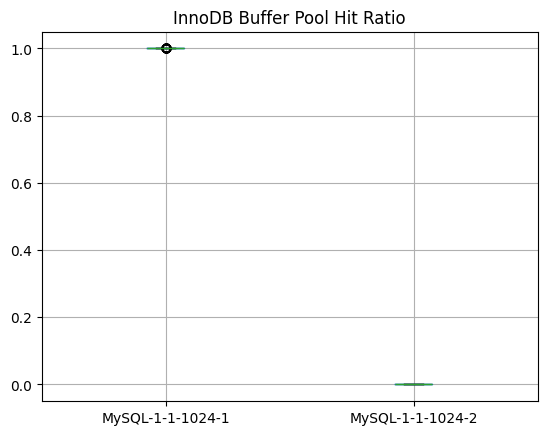

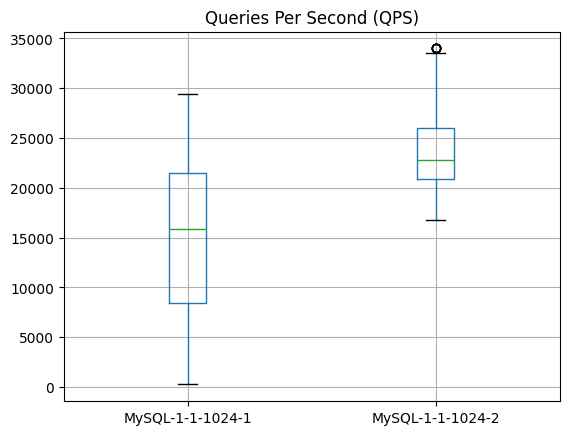

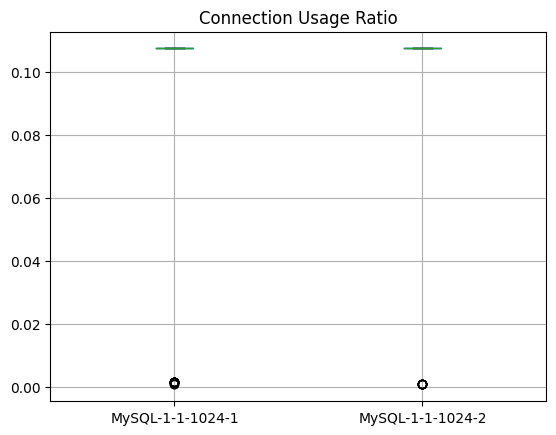

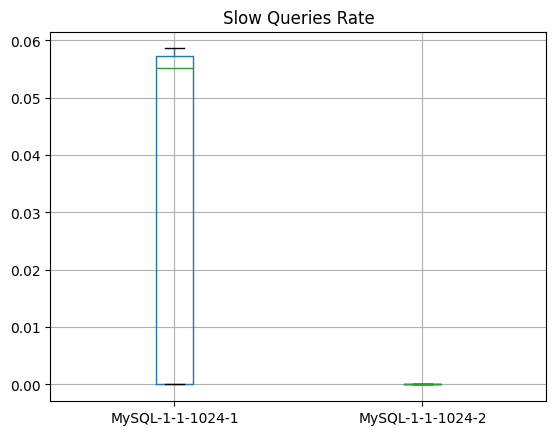

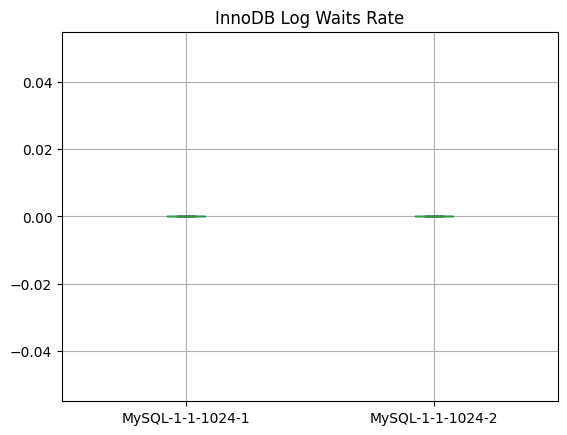

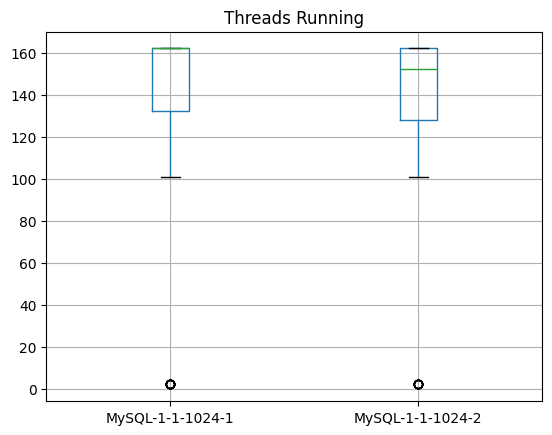

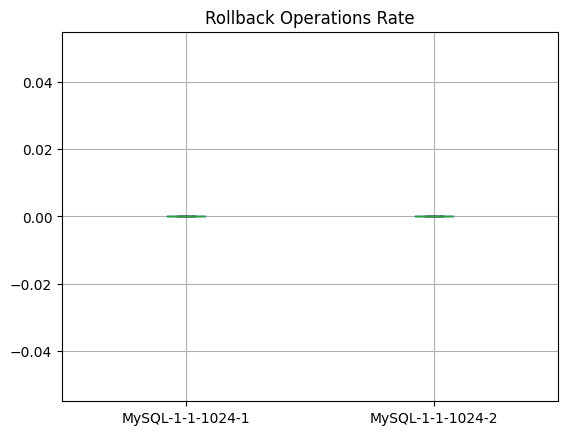

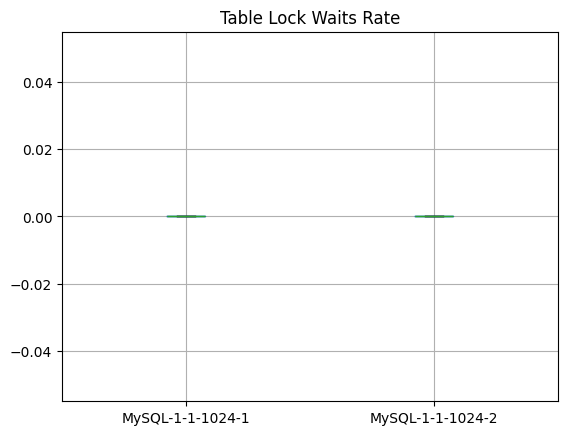

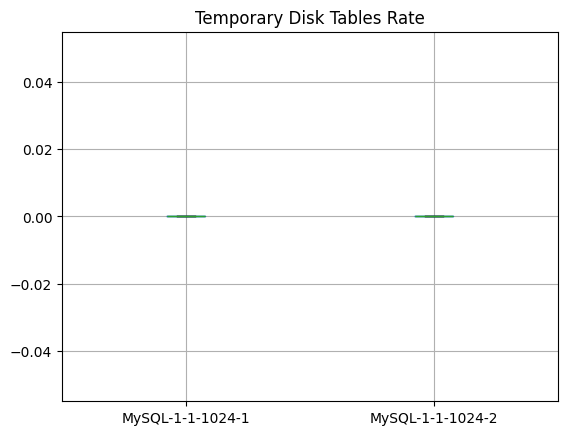

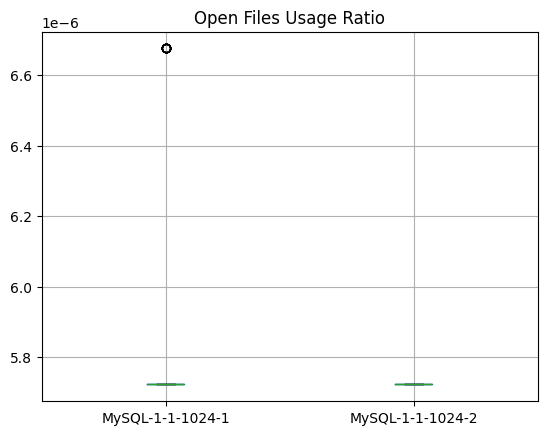

In [8]:
results = []
code = codes[0]
for idx, row in collect.df_metrics.iterrows():
    if row["active"] == False:
        continue
    #print(idx, row["title"])
    metric_name = idx
    method = 'diff' if row["metric"] == 'counter' else 'mean'
    col_name = row["title"]
    df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric_name)
    #print(df_monitoring)
    #plot_boxplots(df_monitoring, y=metric_name, title=col_name)
    ax = df_monitoring.boxplot()
    ax.set_title(col_name)
    plt.show()
    #plot_boxplots(df_performance_first, y='value', title=collect.df_metrics.loc[metric]['title'])

# Boxplot of A Single Metric for a Single Experiment

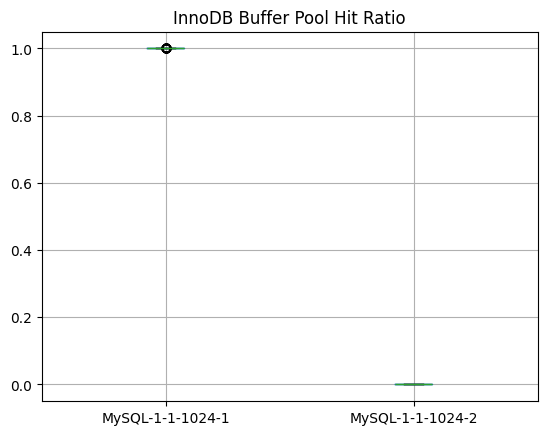

In [9]:
metric = 'mysql_buffer_pool_hit_ratio'
#metric = 'pg_stat_database_blks_reads'
#metric = 'pg_stat_activity_count_idle_transaction'
#metric = 'total_cpu_memory'
code = codes[0]
df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
#df_monitoring.boxplot()
ax = df_monitoring.boxplot()
ax.set_title(collect.df_metrics.loc[metric]['title'])#metric)
plt.show()

# Lineplot of a Single Metric for a Single Experiment

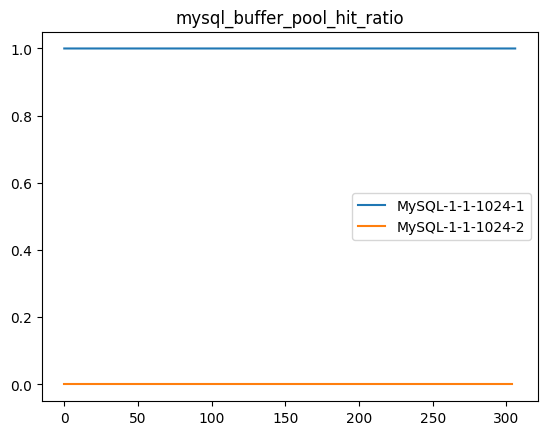

In [10]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
metric = 'total_cpu_memory'
metric = 'total_cpu_util'
metric = 'total_cpu_util_s'
metric = 'mysql_buffer_pool_hit_ratio'

code = codes[0]
df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
ax = df_monitoring.plot()
ax.set_title(metric)
plt.show()
#df_monitoring

# Performance Metrics

<Axes: >

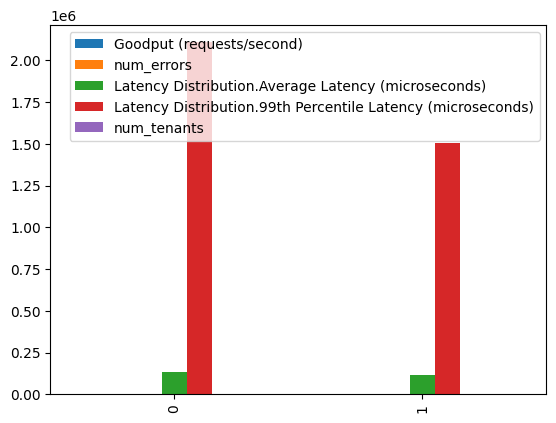

In [11]:
df_performance = collect.get_performance_all()
df_performance.plot.bar()